

```
FOML Assignment 1
Question no 2.(c)
Authors: Pramit Sahoo (AI23MTECH14004) and Sunayna Padhye (AI23MTECH12002)
Date: 08 oct, 2023
```



Dataset : https://archive.ics.uci.edu/dataset/186/wine+quality

This is a dataset where the goal is to develop an ordinal regression model in Python to predict the rating of the wine based on
the input features.

Note: We are considering both red and white wine subset of the data.

Importing Libraries and Installing required packages

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import cohen_kappa_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

**Task 1: Acquire,preprocess, and analyze the data**

1. Download the dataset
2. Load the dataset using python
3. EDA
4. Pre-Processing and Splitting

2. *Loading The Dataset*

In [37]:
# load : red wine dataset
red_wine_data = pd.read_csv('/content/drive/MyDrive/ML_Assignment1/2_Dataset/wine+quality/winequality-red.csv', sep=';')

#load: white wine dataset

white_wine_data = pd.read_csv('/content/drive/MyDrive/ML_Assignment1/2_Dataset/wine+quality/winequality-white.csv', sep=';')

In [38]:
# combining both the datasets
combined_data = pd.concat([red_wine_data, white_wine_data], ignore_index = True)

3. *Exploratory Data Anlysis (EDA)*

In [39]:
# analyzing the data
combined_data.head() # head() will show the top 5 observations


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
combined_data.shape
#shape will display the number of observations(rows) and features(columns) in the dataset

(6497, 12)

In [41]:
combined_data.info()
#info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [42]:
combined_data.nunique()
#nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [43]:
#Missing Values Calculation
#isnull() is widely been in all pre-processing steps to identify null values in the data
combined_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
#The below code helps to calculate the percentage of missing values in each column
(combined_data.isnull().sum()/(len(combined_data)))*100


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

<Axes: >

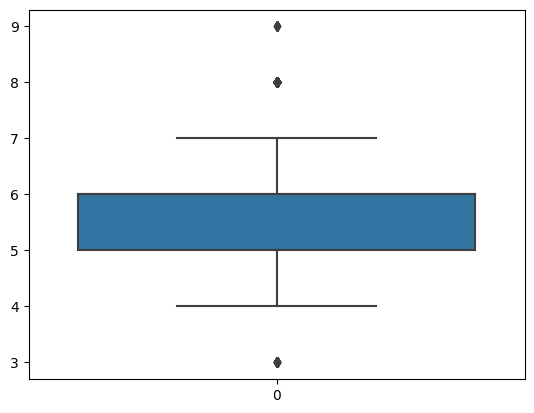

In [45]:
#visualization
sns.boxplot(combined_data['quality'])

*4. Preprocessing and Splitting the data according to the question*

In [46]:
combined_data.fillna(combined_data.mean(), inplace=True) #ills missing values (NaNs) in a pandas DataFrame combined_data with the mean value of each respective column.

In [47]:
# separating features and the main target feature quality
Features_final = combined_data.drop('quality',axis = 1).values
target = combined_data['quality'].values

In [48]:
# preprocessing
Scaler = StandardScaler()
Features_final = Scaler.fit_transform(Features_final)

In [49]:
# splitting the data into training and testing dataset
# F_train and F_test is features_final data and
# T_train and T_test is the target data
F_train, F_test, T_train, T_test = train_test_split(Features_final, target, test_size=0.2, random_state=42)

**Task 2: Using Ordinal Regression and Linear Regression model and Comparing them**

1. Parameter tuning and training the model in case of Ordinal Regression Model
2. Prediction , Evaluation and Accuracy of the Ordinal Regression Model
3. Linear Regression Modelling
4. Result Comparison of Ordinal and Linear Regression

*1. Parameter tuning and training the model in case of Ordinal Regression Model*

In [50]:
pip install mord

In [51]:
from mord import LogisticAT

#Parameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}  #Values of alpha which are to be tested

ordinal_model = LogisticAT()
grid_search = GridSearchCV(ordinal_model, param_grid, cv=5)  #this uses 5-fold cross-validation

#Fit the grid search to the dataset
grid_search.fit(F_train, T_train)

#get the best parameters
best_params = grid_search.best_params_

#Training the model with the best parameters
ordinal_model = LogisticAT(alpha=best_params['alpha'])
ordinal_model.fit(F_train, T_train)

LogisticAT()

2*. Prediction , Evaluation and Accuracy of the Ordinal Regression Model*


In [52]:
# predicting using the trained model
T_pred = ordinal_model.predict(F_test)

#Evaluating the trained model using Cohen's Kappa
o_kappa = cohen_kappa_score(T_test, T_pred)

#Evaluating the trained model using Mean Squared Error (MSE)
o_mse = mean_squared_error(T_test, T_pred)

#Calculating the accuracy
o_accuracy = accuracy_score(T_test, T_pred)


print("Cohen's Kappa:", o_kappa)
print("Mean Squared Error:", o_mse)
print("Accuracy:", o_accuracy)

Cohen's Kappa: 0.2460596092001287
Mean Squared Error: 0.6376923076923077
Accuracy: 0.54


3. *Linear Regression Modelling*


In [53]:
# we will use scikit-learn package for linear regression
from sklearn.linear_model import LinearRegression

linearreg_model = LinearRegression()
linearreg_model.fit(F_train, T_train)

#Predicting data using the trained model
T_pred = linearreg_model.predict(F_test)

#Evaluating the model using Mean Squared Error (MSE)
lin_mse = mean_squared_error(T_test, T_pred)

#Assuming rounding the predicted values to the nearest integer to get classification-like accuracy
rounded_T_pred = T_pred.round().astype(int)

#Calculating Accuracy
lin_accuracy = accuracy_score(T_test, rounded_T_pred)

print("Mean Squared Error:", lin_mse)
print("Accuracy:", lin_accuracy)

Mean Squared Error: 0.5466964419580582
Accuracy: 0.5392307692307692


4. *Result Comparison of Ordinal and Linear Regression*

In [54]:
models_selected = ['Linear Regression', 'Ordinal Regression', ]
acc = [lin_accuracy, o_accuracy]
mse = [lin_mse, o_mse]


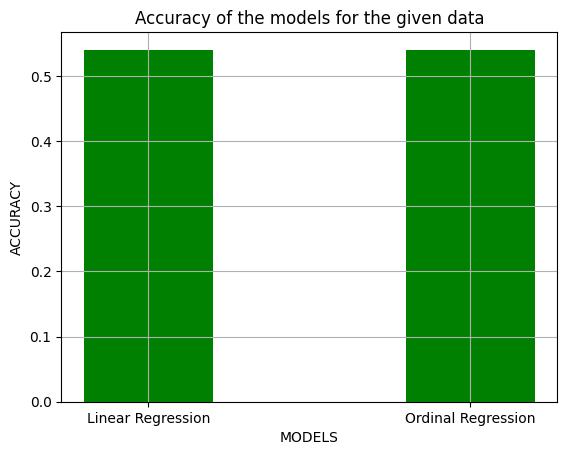

In [55]:
# plotting the accuracy to these models using bar
plt.bar(models_selected, acc, color ='green', width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("Accuracy of the models for the given data")
plt.grid()
plt.show()


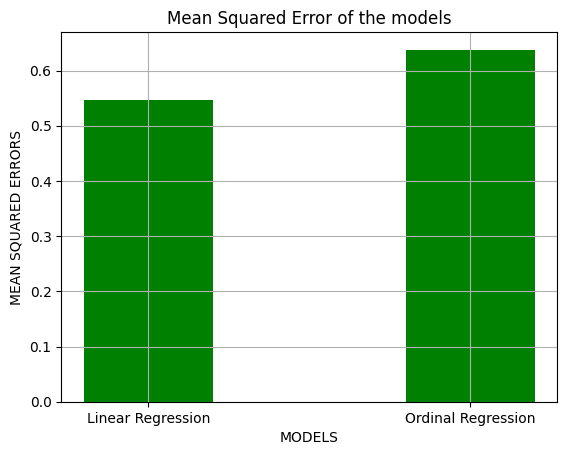

In [56]:
# plotting the MSE for the models
plt.bar(models_selected, mse, color ='green', width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("MEAN SQUARED ERRORS")
plt.title("Mean Squared Error of the models")
plt.grid()
plt.show()

**Task 3: Using other Models like Random Forest and Gradient Boosting Machine and comparing with Linear Regression model and ordinal regression model and Comparing them**

1. Random Forest Modelling
2. Gradient Boosting Machine Modelling
3. Result Comparison of RF and GBM with Ordinal and Linear Regression

1. *Random Forest*

In [57]:
from sklearn.ensemble import RandomForestRegressor


#Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}
rf_regressor = RandomForestRegressor()
grid_rf = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(F_train, T_train)

#Getting the Best parameters and building the model
best_params = grid_rf.best_params_
rf_model = grid_rf.best_estimator_

#Predicting the data using the trained model
T_pred = rf_model.predict(F_test)

#Evaluating the trained rf_model using Cohen's Kappa
rf_kappa = cohen_kappa_score(T_test, T_pred.round())

#Evaluating the trained rf_model using Mean Squared Error (MSE)
rf_mse = mean_squared_error(T_test, T_pred)


#Calculating accuracy (rounding the predicted values to the nearest integer)
rounded_T_pred = T_pred.round().astype(int)
rf_accuracy = accuracy_score(T_test, rounded_T_pred)


print("Cohen's Kappa:", rf_kappa)
print("Mean Squared Error:", rf_mse)
print("Accuracy:", rf_accuracy)

Cohen's Kappa: 0.4767062849415066
Mean Squared Error: 0.369476
Accuracy: 0.6684615384615384


2. *Gradient Boosting Machine*

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, mean_squared_error, accuracy_score

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.1, 0.2]}
gbm_regressor = GradientBoostingRegressor()
grid_gbm = GridSearchCV(gbm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_gbm.fit(F_train, T_train)

# Get the Best parameters and build the model
best_params = grid_gbm.best_params_
gbm_model = grid_gbm.best_estimator_

# Predicting the data using the trained model
T_pred = gbm_model.predict(F_test)

# Evaluating the trained gbm_model using Cohen's Kappa
gbm_kappa = cohen_kappa_score(T_test, T_pred.round())

# Evaluating the trained gbm_model using Mean Squared Error (MSE)
gbm_mse = mean_squared_error(T_test, T_pred)

# Calculating accuracy (rounding the predicted values to the nearest integer)
rounded_T_pred = T_pred.round().astype(int)
gbm_accuracy = accuracy_score(T_test, rounded_T_pred)

print("Cohen's Kappa:", gbm_kappa)
print("Mean Squared Error:", gbm_mse)
print("Accuracy:", gbm_accuracy)


Cohen's Kappa: 0.4125980314997082
Mean Squared Error: 0.4071394873405089
Accuracy: 0.6246153846153846


3. *Result Comparison of RF and GBM with Ordinal and Linear Regression*

3.1 *Comparing RF and GBM with Ordinal*

In [61]:
algos = ['Gradient Boosting Machine', 'Ordinal Regression', 'Random Forest']
acc = [gbm_accuracy, o_accuracy, rf_accuracy]
mse = [gbm_mse, o_mse, rf_mse]
kappa = [gbm_kappa, o_kappa, rf_kappa]

print(acc,mse,kappa, sep='\n')

[0.6246153846153846, 0.54, 0.6684615384615384]
[0.4071394873405089, 0.6376923076923077, 0.369476]
[0.4125980314997082, 0.2460596092001287, 0.4767062849415066]


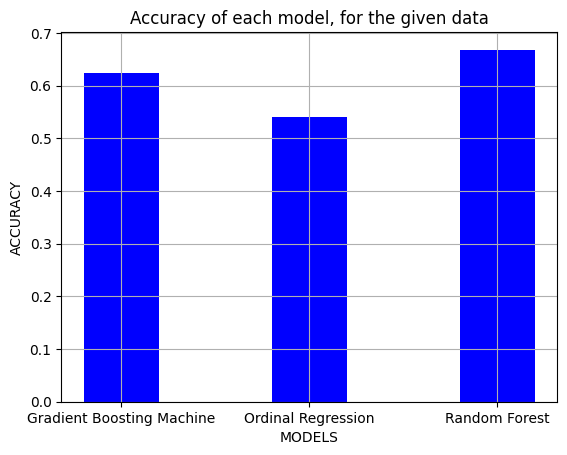

In [62]:
#plotting for accuracy
plt.bar(algos, acc, color ='blue', width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("Accuracy of each model, for the given data")
plt.grid()
plt.show()

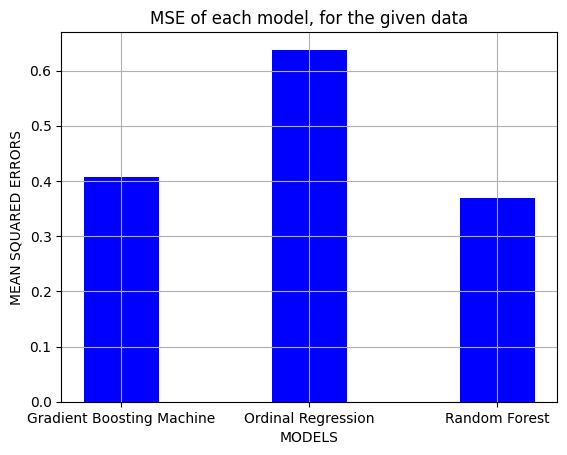

In [64]:
# bar plot for MSE
plt.bar(algos, mse, color ='blue', width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("MEAN SQUARED ERRORS")
plt.title("MSE of each model, for the given data")
plt.grid()
plt.show()

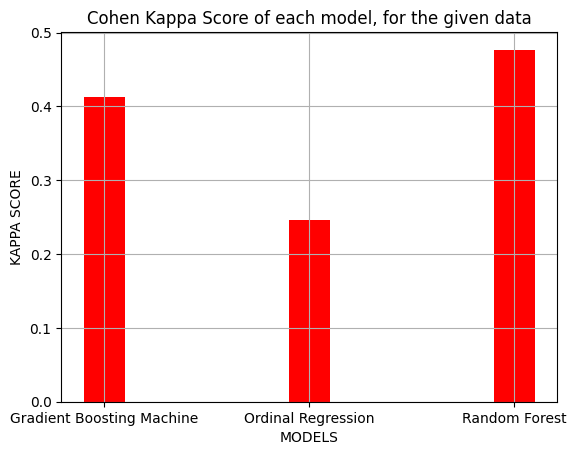

In [66]:
# Bar plot for kappa score through various models
plt.bar(algos, kappa, color ='red', width = 0.2)

plt.xlabel("MODELS")
plt.ylabel("KAPPA SCORE")
plt.title("Cohen Kappa Score of each model, for the given data")
plt.grid()
plt.show()

3.2 *Comparison of RF and GBM with Ordinal and Linear Regression*

In [67]:
algos = ['Linear Regression', 'Ordinal Regression', 'Random Forest', 'Gradient Boosting Machine']
acc = [lin_accuracy, o_accuracy, rf_accuracy, gbm_accuracy]
mse = [lin_mse, o_mse, rf_mse, gbm_mse]

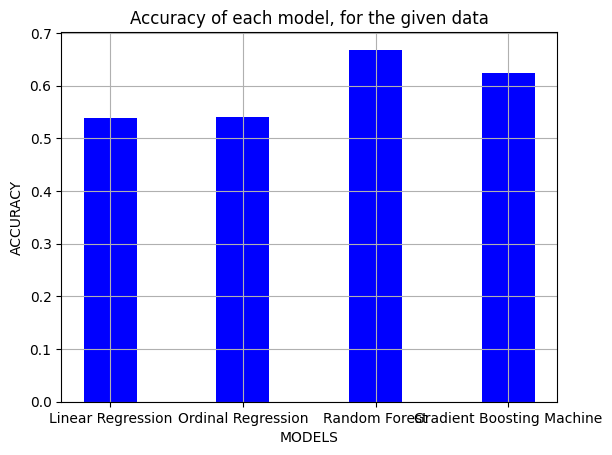

In [69]:
#plotting for accuracy
plt.bar(algos, acc, color ='blue', width = 0.4)

plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("Accuracy of each model, for the given data")
plt.grid()
plt.show()

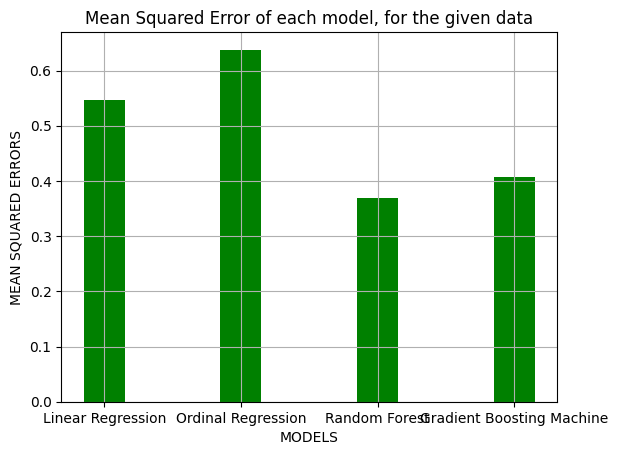

In [70]:
# plotting mse
plt.bar(algos, mse, color ='green', width = 0.3)

plt.xlabel("MODELS")
plt.ylabel("MEAN SQUARED ERRORS")
plt.title("Mean Squared Error of each model, for the given data")
plt.grid()
plt.show()